# **Libraries**

In [214]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# **Import data from Csv**

In [3]:
csv_data = pd.read_csv('C:\\Users\\david.sladkov\\Desktop\\goalscorers.csv')

In [4]:
csv_data

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False


In [5]:
csv_data.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


In [6]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


# **GOALS COUNT**

In [7]:
goals_count = 0

In [11]:
for goal in csv_data.scorer:
    goals_count+=1

In [12]:
goals_count

44362

# **TOP Goal-Scorers**

In [13]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [41]:
top_scorers = csv_data['scorer'].value_counts()

Text(0.5, 1.0, 'Top-Scorers')

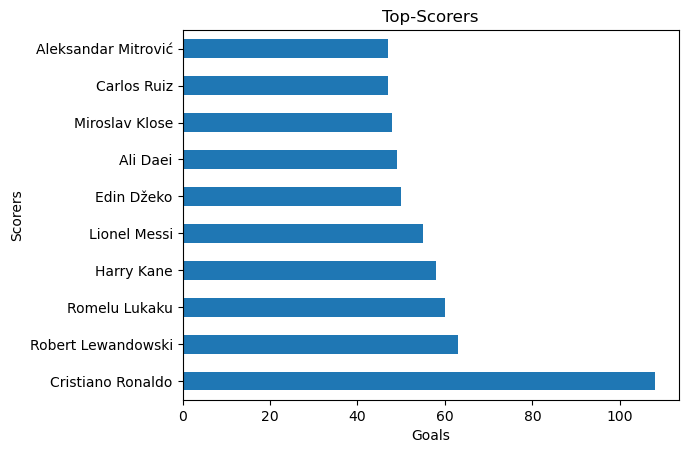

In [58]:
top_scorers.groupby(['scorer'])['Goals'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.xlabel('Goals')
plt.ylabel('Scorers')
plt.title('Top-Scorers')

# **Top Own goal scorers**

In [69]:

scorer_own_goal = csv_data[['scorer', 'own_goal']]

In [70]:
scorer_own_goal

,scorer,own_goal
0,José Piendibene,False
1,Isabelino Gradín,False
2,Isabelino Gradín,False
3,José Piendibene,False
4,Alberto Ohaco,False
...,...,...
44357,Luis Suárez,False
44358,Lautaro Martínez,False
44359,Nico Williams,False
44360,Cole Palmer,False


In [71]:
own_goals_count = csv_data[csv_data['own_goal'] == True]['scorer'].value_counts()

In [72]:
own_goals_df = own_goals_count.reset_index()

In [78]:
own_goals_df.columns = ['Scorer', 'Own_Goals']


In [84]:
own_goals_df.head(10)

,Scorer,Own_Goals
0,Ragnar Klavan,3
1,José del Solar,3
2,Cristian Brolli,3
3,Ján Ďurica,3
4,Walid Abbas,3
5,Raio Piiroja,3
6,Gustavo Gómez,3
7,Rashad Sadygov,3
8,Roberto Ayala,3
9,Nayef Aguerd,2


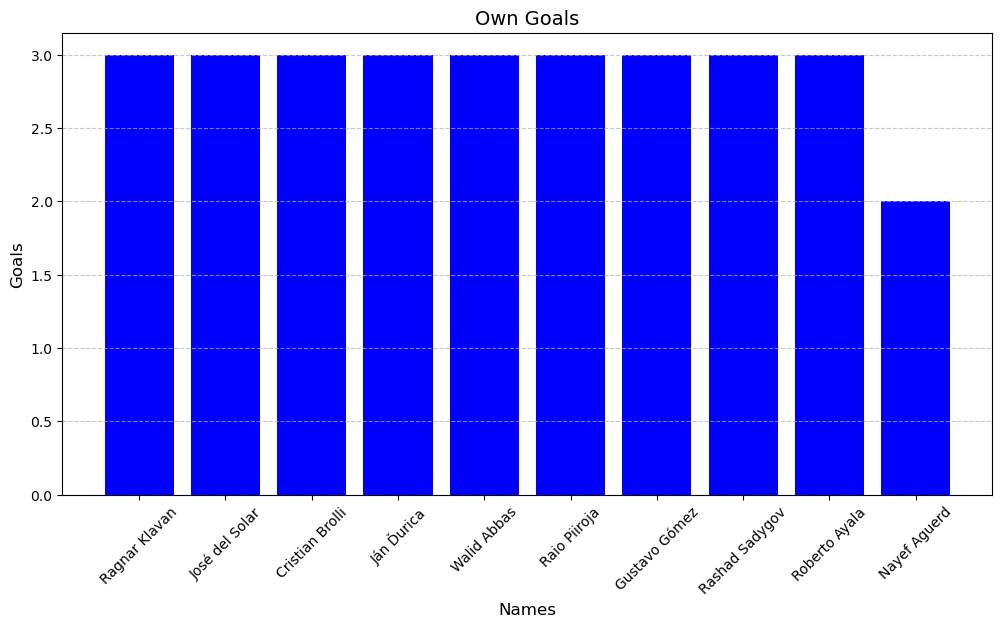

In [86]:
plt.figure(figsize = (12,6))
plt.bar(own_goals_df.Scorer.head(10),own_goals_df.Own_Goals.head(10),color = "blue")
plt.title("Own Goals", fontsize=14)
plt.xlabel("Names", fontsize=12)
plt.ylabel("Goals", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle="--", alpha=0.7) 

# **Top penalty scorers**

In [89]:
top_scorers_via_penalty = csv_data[csv_data['penalty'] == True]['scorer'].value_counts()
top_scorers_via_penalty


scorer
Harry Kane              20
Cristiano Ronaldo       19
Lionel Messi            14
Hristo Stoichkov        13
Robert Lewandowski      13
                        ..
Whayne Wilson            1
Freddie Ljungberg        1
Mohammad Al-Shalhoub     1
Carlos Rivas             1
Lucas Paquetá            1
Name: count, Length: 1715, dtype: int64

In [120]:
top_scorers_via_penalty = top_scorers_via_penalty.reset_index()

top_scorers_via_penalty.columns = ["Scorer", "count"]

top_scorers_via_penalty["Goals"] = top_scorers_via_penalty["count"]

top_scorers_via_penalty.head()

,Scorer,count,Goals
0,Harry Kane,20,20
1,Cristiano Ronaldo,19,19
2,Lionel Messi,14,14
3,Hristo Stoichkov,13,13
4,Robert Lewandowski,13,13


In [121]:
top_scorers_via_penalty.drop(['count'],axis = 1)

,Scorer,Goals
0,Harry Kane,20
1,Cristiano Ronaldo,19
2,Lionel Messi,14
3,Hristo Stoichkov,13
4,Robert Lewandowski,13
...,...,...
1710,Whayne Wilson,1
1711,Freddie Ljungberg,1
1712,Mohammad Al-Shalhoub,1
1713,Carlos Rivas,1


Text(0.5, 1.0, 'Top penalty scorers')

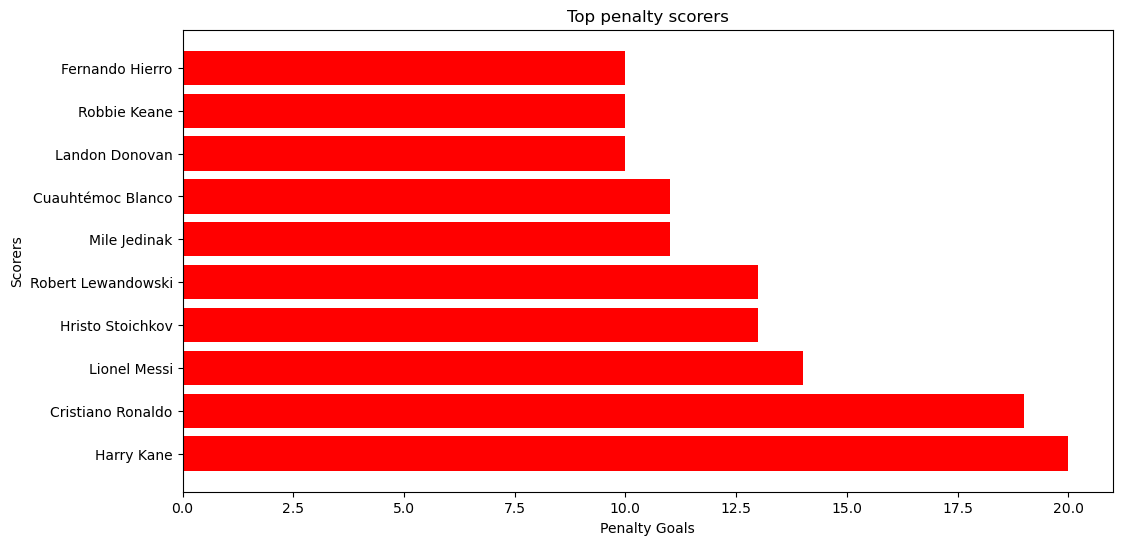

In [124]:
plt.figure(figsize = (12,6))
plt.barh(top_scorers_via_penalty.Scorer.head(10),top_scorers_via_penalty.Goals.head(10),color = 'red')
plt.xlabel('Penalty Goals')
plt.ylabel('Scorers')
plt.title('Top penalty scorers')

# **Top teams Goals**

In [156]:
top_team_goals = csv_data['team'].value_counts()


In [157]:
top_team_goals

team
Brazil           1051
Germany           974
Argentina         948
Spain             894
Mexico            852
                 ... 
Eritrea             4
Somalia             3
Anguilla            2
South Sudan         2
French Guiana       2
Name: count, Length: 220, dtype: int64

In [158]:
top_team_goals = top_team_goals.reset_index()

In [159]:
top_team_goals

,team,count
0,Brazil,1051
1,Germany,974
2,Argentina,948
3,Spain,894
4,Mexico,852
...,...,...
215,Eritrea,4
216,Somalia,3
217,Anguilla,2
218,South Sudan,2


In [145]:

top_team_goals.drop(['index','level_0','Goals'],axis = 1 ,inplace=True)


In [162]:
top_team_goals["Goals"] = top_team_goals["count"]
top_team_goals.head()

,team,count,Goals
0,Brazil,1051,1051
1,Germany,974,974
2,Argentina,948,948
3,Spain,894,894
4,Mexico,852,852


In [163]:
top_team_goals.drop(['count'],axis = 1 ,inplace=True)

In [167]:
top_team_goals.head()

,team,Goals
0,Brazil,1051
1,Germany,974
2,Argentina,948
3,Spain,894
4,Mexico,852


Text(0.5, 1.0, 'Top Team scorers')

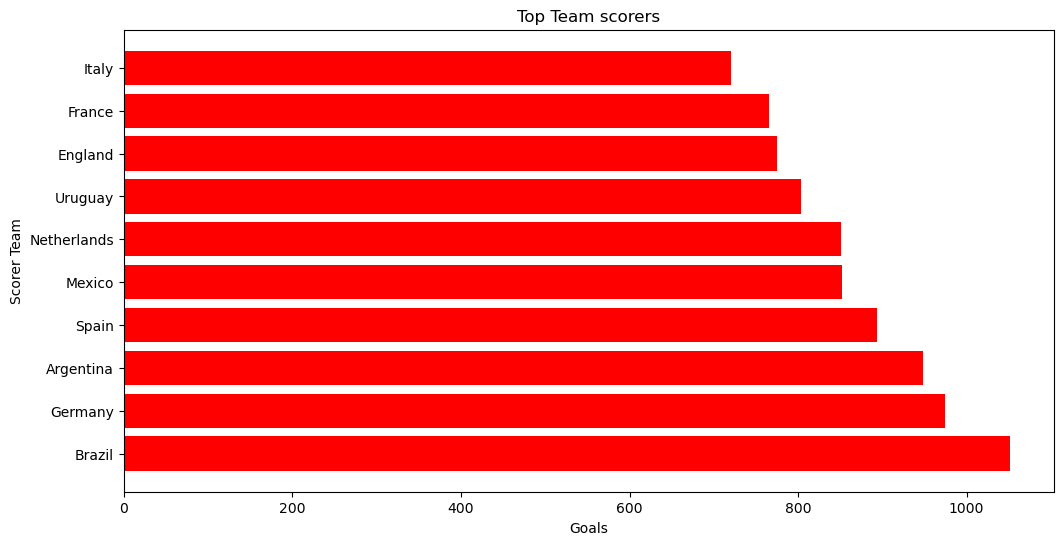

In [166]:
plt.figure(figsize = (12,6))
plt.barh(top_team_goals.team.head(10),top_team_goals.Goals.head(10),color = 'red')
plt.xlabel('Goals')
plt.ylabel('Scorer Team')
plt.title('Top Team scorers')

# **Top goals in a day**

In [170]:
top_day_goals = csv_data['date'].value_counts()

In [171]:
top_day_goals

date
2011-10-11    145
2008-10-11    136
2008-09-06    135
2004-09-08    132
2004-10-13    128
             ... 
1994-11-15      1
2007-11-16      1
1964-10-14      1
1964-11-11      1
1989-11-17      1
Name: count, Length: 4632, dtype: int64

In [197]:
date_goals = csv_data.groupby("date")["team"].value_counts()
date_goals = date_goals.reset_index()
date_goals["goals"] = date_goals['count']
date_goals.drop('count',axis = 1,inplace = True)

In [205]:
date_goals = date_goals.sort_values(by="goals", ascending=False)

In [206]:
date_goals

,date,team,goals
9589,2001-04-11,Australia,31
9587,2001-04-09,Australia,22
9416,2000-11-24,Iran,19
7958,1997-06-02,Iran,17
9159,2000-06-19,Australia,17
...,...,...,...
13581,2009-06-15,United States,1
13584,2009-06-17,Bahrain,1
13585,2009-06-17,Iran,1
13586,2009-06-17,Japan,1


In [ ]:
date_goals.drop('count',axis = 1,inplace = True)

In [200]:
import seaborn as sns


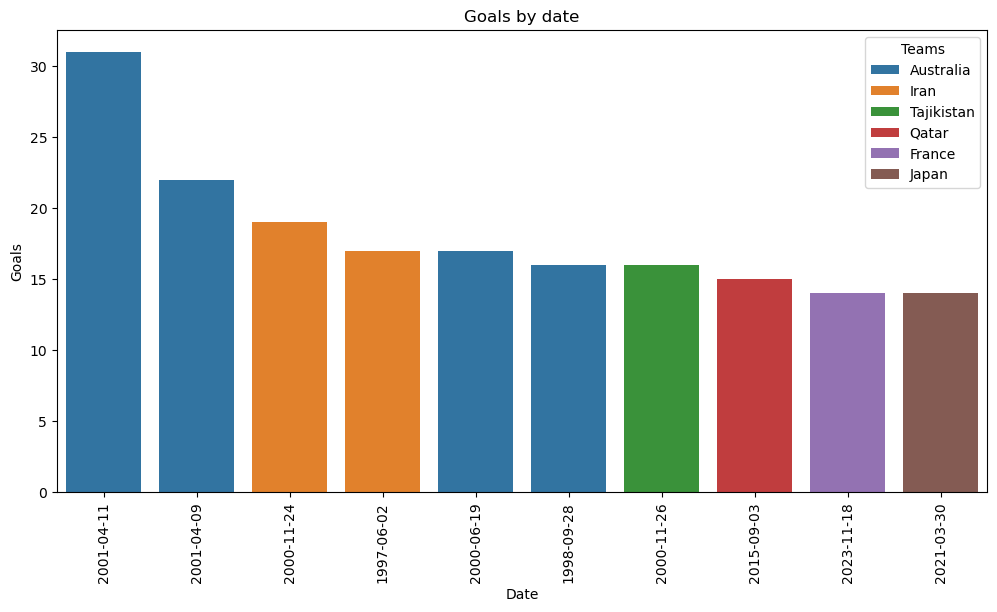

In [215]:
plt.figure(figsize=(12,6))
sns.barplot(data=date_goals.head(10), x="date", y="goals", hue="team")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Goals")
plt.title("Goals by date")
plt.legend(title="Teams")
plt.show()


# **TOP MINUTE GOAL**

In [258]:
top_minute = csv_data.groupby('minute')['team'].value_counts()

In [259]:
top_minute.head(100)

minute  team       
1.0     Argentina       8
        Uruguay         8
        Brazil          7
        England         6
        Netherlands     6
                       ..
        Venezuela       1
        Zambia          1
2.0     Argentina      11
        Brazil          9
        Denmark         8
Name: count, Length: 100, dtype: int64

In [260]:
top_minute = top_minute.reset_index()

In [262]:
top_minute['goals'] = top_minute['count']

In [264]:
top_minute.drop('count',axis = 1,inplace = True)

In [265]:
top_minute

,minute,team,goals
0,1.0,Argentina,8
1,1.0,Uruguay,8
2,1.0,Brazil,7
3,1.0,England,6
4,1.0,Netherlands,6
...,...,...,...
12564,120.0,South Korea,1
12565,120.0,Turkey,1
12566,120.0,Ukraine,1
12567,120.0,Zambia,1


In [277]:
top_minute = top_minute.sort_values(by="goals", ascending=False)

In [269]:
top_one_minute =  csv_data[csv_data["minute"] == 1]

In [278]:
top_minute

,minute,team,goals
12160,90.0,Portugal,41
12159,90.0,Netherlands,41
12161,90.0,Brazil,38
12162,90.0,Spain,33
12163,90.0,Mexico,31
...,...,...,...
4130,32.0,Uganda,1
4129,32.0,Trinidad and Tobago,1
4128,32.0,Togo,1
9252,69.0,Angola,1


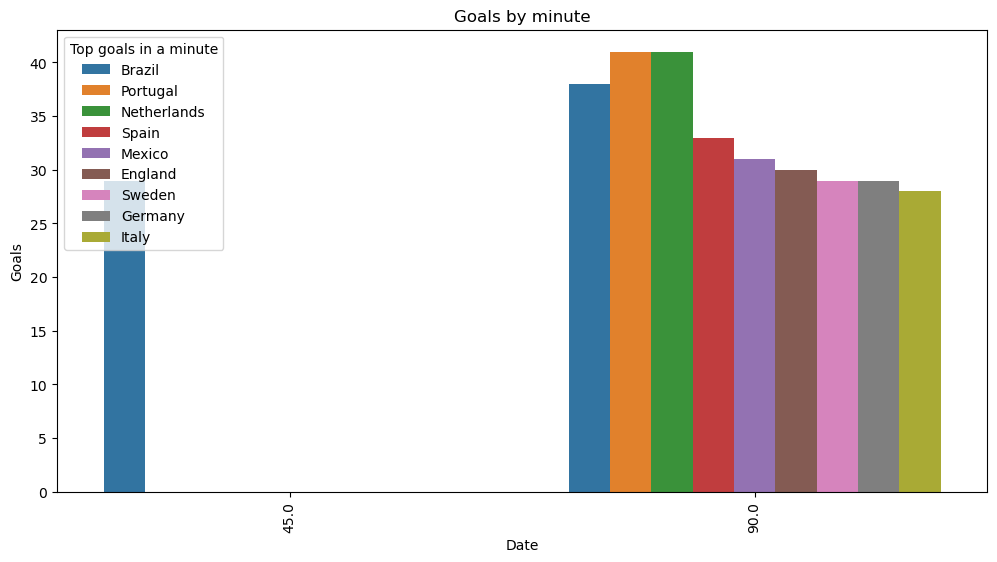

In [280]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_minute.head(10), x="minute", y="goals", hue="team")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Goals")
plt.title("Goals by minute")
plt.legend(title="Top goals in a minute")
plt.show()

# **GOALS IN MINUTES**

In [283]:
minutes_goal = top_minute.groupby('minute')['goals'].value_counts()

In [ ]:
date_goals = csv_data.groupby("date")["team"].value_counts()

In [284]:
minutes_goal

minute  goals
1.0     1        51
        2        21
        3        11
        4         6
        5         3
                 ..
118.0   2         1
119.0   1         7
        2         1
120.0   1        12
122.0   1         1
Name: count, Length: 1216, dtype: int64